In [141]:
import numpy as np
import matplotlib.pyplot as plt
from color_model import read_image_from_filelist, make_symlink, read_image
from sdetector import get_roi_frame, width, height, area
import seaborn as sns
import cv2

sns.set()

# set1 params
# datadir='data/image/act1/'
# ref_filename=datadir+'frame-083.jpg'
# basenames=['frame-000.jpg', 'frame-057.jpg']
# rois=[[171, 22, 367, 157], [270, 0, 404, 100]]

# set2 params
datadir='data/kmeans-train-class_1/'
ref_filename=datadir+'frame-219.jpg'
basenames=['frame-186.jpg', 'frame-196.jpg']
rois=[[205, 148, 534, 330], [270, 0, 404, 100]]

filenames=[ datadir + x for x in basenames ]

i=0
filename=filenames[i]
roi=rois[i]

x=roi[0]
y=roi[1]
w=roi[2]-roi[0]
h=roi[3]-roi[1]

print(filename)
img = read_image(filename)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

refimg = read_image(ref_filename)
refimg = cv2.cvtColor(refimg, cv2.COLOR_RGB2GRAY)

refroiimg = refimg[y:y+h, x:x+w]
roiimg = img[y:y+h, x:x+w]

data/kmeans-train-class_1/frame-186.jpg


In [142]:
def new_figure():
    plt.figure(figsize=(20, 5))

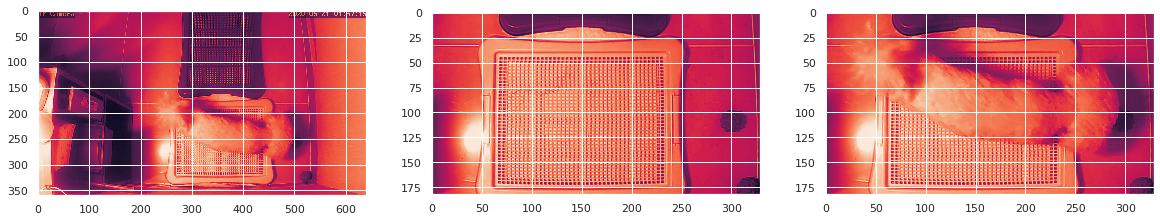

In [143]:
new_figure()
plt.subplot(1, 3, 1)
plt.imshow(img)
plt.subplot(1, 3, 2)
plt.imshow(refroiimg)
plt.subplot(1, 3, 3)
plt.imshow(roiimg)

In [144]:
def get_hist(frame):
    frame2 = cv2.medianBlur(frame, 5)
    hist = cv2.calcHist([frame2], [0], None, [256], [0, 256])
    hist += 1
    hist /= hist.sum()
    return hist

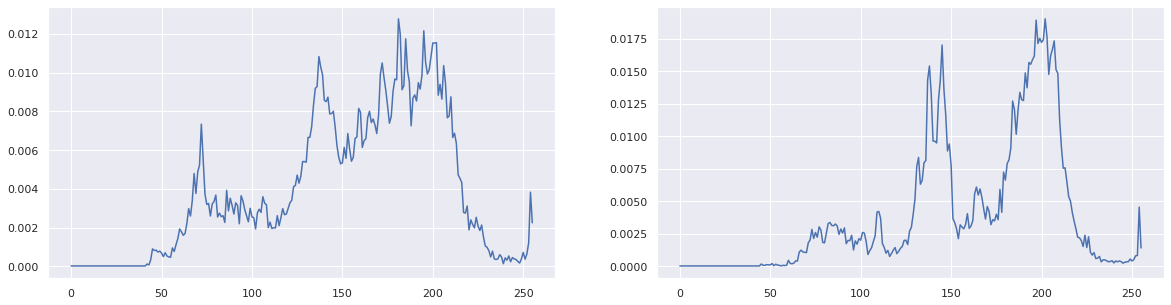

In [145]:
frame = roiimg
histimg=get_hist(frame)

rframe = refroiimg
rhistimg = get_hist(rframe)

new_figure()
plt.subplot(1, 2, 1)
plt.plot(histimg)
plt.subplot(1, 2, 2)
plt.plot(rhistimg)

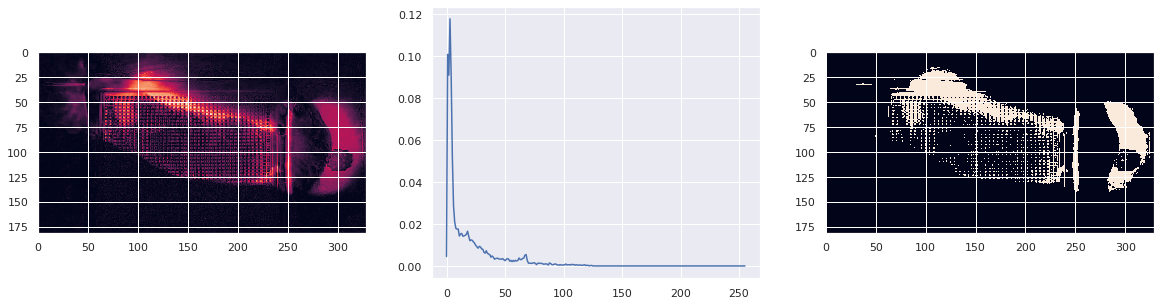

In [146]:
difference = cv2.absdiff(frame.astype('uint8'), rframe.astype('uint8'))
_, difference_t = cv2.threshold(difference, 50, 255, cv2.THRESH_BINARY)

new_figure()
plt.subplot(1, 3, 1)
plt.imshow(difference)
plt.subplot(1, 3, 2)
plt.plot(get_hist(difference))
plt.subplot(1, 3, 3)
plt.imshow(difference_t)

## Morphological closing (dialation -> erosion)

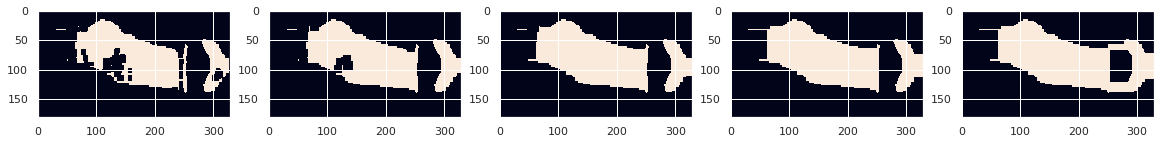

In [147]:
kernel = np.ones((7, 7), np.uint8)
niter=5
new_figure()
for i in range(5):
    newdifference_t = cv2.morphologyEx(difference_t, cv2.MORPH_CLOSE, kernel, iterations=i+1)
    plt.subplot(1, niter, i+1)
    plt.imshow(newdifference_t)

## Morphological opening(erosion -> dialation)

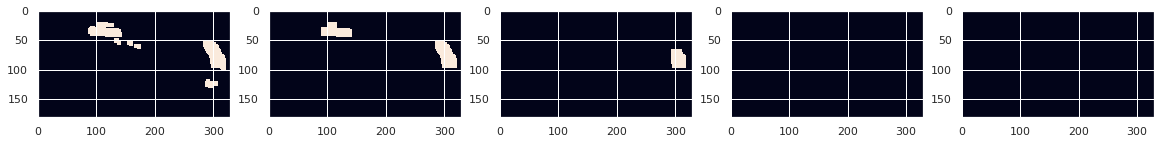

In [148]:
kernel = np.ones((7, 7), np.uint8)
niter=5
new_figure()
for i in range(5):
    newdifference_t = cv2.morphologyEx(difference_t, cv2.MORPH_OPEN, kernel, iterations=i+1)
    plt.subplot(1, niter, i+1)
    plt.imshow(newdifference_t)

## Morphological Closing -> Morphological Opening

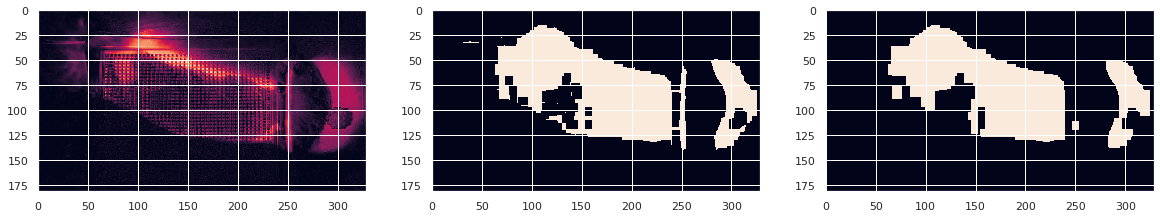

In [149]:
kernel = np.ones((7, 7), np.uint8)
niter=5
newdifference_t1 = cv2.morphologyEx(difference_t, cv2.MORPH_CLOSE, kernel, iterations=1)
newdifference_t2 = cv2.morphologyEx(newdifference_t1, cv2.MORPH_OPEN, kernel, iterations=1)

new_figure()
plt.subplot(1, 3, 1)
plt.imshow(difference)
plt.subplot(1, 3, 2)
plt.imshow(newdifference_t1)
plt.subplot(1, 3, 3)
plt.imshow(newdifference_t2)